Before you turn in the homework, make sure everything runs as expected. To do so, select **Kernel**$\rightarrow$**Restart & Run All** in the toolbar above.  Remember to submit both on **DataHub** and **Gradescope**.

Please fill in your name and include a list of your collaborators below.

In [1]:
NAME = "Vinay Maruri"
COLLABORATORS = ""

---

# Project 2: NYC Taxi Rides
# Part 3: NYC Accidents Data

In the real world, data isn't always nicely bundled in one file; data can be sourced from many places with many formats. Now we will use NYC accident data to try to improve our set of features.

In this part of the project, you'll do some EDA over the combined data set. We'll do a lot of the coding work for you, but there will be a few coding subtasks for you to complete on your own, as well as many results to interpret.

### Note
If your kernel dies unexpectedly, make sure you have shutdown all other notebooks. Each notebook uses valuable memory which we will need for this part of the project.

# Imports

Let us start by loading the Python libraries and custom tools we will use in this part.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from pathlib import Path

sns.set(style="whitegrid", palette="muted")

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

%matplotlib inline

## Downloading the Data

We will use the `fetch_and_cache` utility to download the dataset.

In [3]:
# Download and cache urls and get the file objects.
from utils import fetch_and_cache
data_url = 'https://github.com/DS-100/fa18/raw/gh-pages/assets/datasets/collisions.zip'
file_name = 'collisions.zip'
dest_path = fetch_and_cache(data_url=data_url, file=file_name)

print(f'Located at {dest_path}')

Using version already downloaded: Mon Dec  3 22:06:20 2018
MD5 hash of file: a445b925d24f319cb60bd3ace6e4172b
Located at data/collisions.zip


We will store the taxi data locally before loading it.

In [4]:
collisions_zip = zipfile.ZipFile(dest_path, 'r')

#Extract zip files 
collisions_dir = Path('data/collisions')
collisions_zip.extractall(collisions_dir)

## Loading and Formatting Data 

The following code loads the collisions data into a Pandas DataFrame.

In [5]:
# Run this cell to load the collisions data. 
skiprows = None
collisions = pd.read_csv(collisions_dir/'collisions_2016.csv', index_col='UNIQUE KEY', 
                         parse_dates={'DATETIME':["DATE","TIME"]}, skiprows=skiprows)
collisions['TIME'] = pd.to_datetime(collisions['DATETIME']).dt.hour
collisions['DATE'] = pd.to_datetime(collisions['DATETIME']).dt.date
collisions = collisions.dropna(subset=['LATITUDE', 'LONGITUDE'])
collisions = collisions[collisions['LATITUDE'] <= 40.85]
collisions = collisions[collisions['LATITUDE'] >= 40.63]
collisions = collisions[collisions['LONGITUDE'] <= -73.65]
collisions = collisions[collisions['LONGITUDE'] >= -74.03]
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116691 entries, 3589202 to 3363795
Data columns (total 30 columns):
DATETIME                         116691 non-null datetime64[ns]
Unnamed: 0                       116691 non-null int64
BOROUGH                          100532 non-null object
ZIP CODE                         100513 non-null float64
LATITUDE                         116691 non-null float64
LONGITUDE                        116691 non-null float64
LOCATION                         116691 non-null object
ON STREET NAME                   95914 non-null object
CROSS STREET NAME                95757 non-null object
OFF STREET NAME                  61545 non-null object
NUMBER OF PERSONS INJURED        116691 non-null int64
NUMBER OF PERSONS KILLED         116691 non-null int64
NUMBER OF PEDESTRIANS INJURED    116691 non-null int64
NUMBER OF PEDESTRIANS KILLED     116691 non-null int64
NUMBER OF CYCLIST INJURED        116691 non-null int64
NUMBER OF CYCLIST KILLED         116691 

## 1: EDA of Accidents

Let's start by plotting the latitude and longitude where accidents occur. This may give us some insight on taxi ride durations. We sample N times (given) from the collisions dataset and create a 2D KDE plot of the longitude and latitude. We make sure to set the x and y limits according to the boundaries of New York, given below.

Here is a [map of Manhattan](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488) for your convenience.

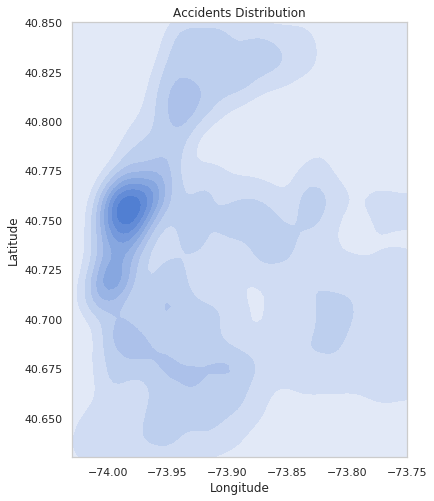

In [6]:
# Plot lat/lon of accidents, will take a few seconds
N = 20000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

sample = collisions.sample(N)
plt.figure(figsize=(6,8))
sns.kdeplot(sample["LONGITUDE"], sample["LATITUDE"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Distribution")
plt.show();

### Question 1a
What can you say about the location density of NYC collisions based on the plot above?

**Hint: Here is a [page](https://www.google.com/maps/place/Manhattan,+New+York,+NY/@40.7590402,-74.0394431,12z/data=!3m1!4b1!4m5!3m4!1s0x89c2588f046ee661:0xa0b3281fcecc08c!8m2!3d40.7830603!4d-73.9712488) that may be useful, and [another page](https://www.6sqft.com/what-nycs-population-looks-like-day-vs-night/) that may be useful.**

In [7]:
q1a_answer = r"""

Based on the plot above, it appears that the highest density of collisions in the dataset occurs in the area consisting of Midtown, Hell's Kitchen, and Times Square. This is most likely due to the fact that during the day, this is the most heavily populated area of New York City, as people pour into the area to work at the many office buildings in this area from the New York-New Jersey-Connecticut metro area. Because of this high population level, there are a lot of cars driving in this area, creating a higher risk of collisions, as evidenced by the plot above. The other area of high collisions is in Lower Manhattan, in the areas surrounding Soho, Noho, Greenwich Village and New York University. An expanation for this is that in this area of Manhattan, the strict grid system that governs the design of Manhattan's roads breaks down as roads no longer run north-northeast/south-southewst and west-northwest/east-southeast. The roads run in many different directions and at non-uniform angles, creating more dangerous roads to navigate than in other areas of Manhattan where the grid system holds. The final conclusions is that areas that are primarily residential (Brooklyn, Queens, Manhattan from Central Park north, Bronx) experience collisions at a lower frequency. This is likely because there is less car traffic in these areas, as people don't commute from the greater New York metropolitan area to get into these areas, and residents of these areas likely don't drive to get to places, preferring to take the subway or bus instead. 

(Car Ownership in New York City is the lowest among America's major cities, with a majority of households not owning a car. (source: http://www.governing.com/gov-data/car-ownership-numbers-of-vehicles-by-city-map.html, used American Community Survey data collected by the Census Bureau in 2015 and 2016.))

"""


print(q1a_answer)



Based on the plot above, it appears that the highest density of collisions in the dataset occurs in the area consisting of Midtown, Hell's Kitchen, and Times Square. This is most likely due to the fact that during the day, this is the most heavily populated area of New York City, as people pour into the area to work at the many office buildings in this area from the New York-New Jersey-Connecticut metro area. Because of this high population level, there are a lot of cars driving in this area, creating a higher risk of collisions, as evidenced by the plot above. The other area of high collisions is in Lower Manhattan, in the areas surrounding Soho, Noho, Greenwich Village and New York University. An expanation for this is that in this area of Manhattan, the strict grid system that governs the design of Manhattan's roads breaks down as roads no longer run north-northeast/south-southewst and west-northwest/east-southeast. The roads run in many different directions and at non-uniform ang

We see that an entry in accidents contains information on number of people injured/killed. Instead of using each of these columns separately, let's combine them into one column called `'SEVERITY'`. Let's also make columns `FATALITY` and `INJURY`, each aggregating the fatalities and injuries respectively.

In [8]:
collisions['SEVERITY'] = collisions.filter(regex=r'NUMBER OF *').sum(axis=1)
collisions['FATALITY'] = collisions.filter(regex=r'KILLED').sum(axis=1)
collisions['INJURY'] = collisions.filter(regex=r'INJURED').sum(axis=1)

Now let's group by time and compare two aggregations: count vs mean. Below we plot the number of collisions and the mean severity of collisions by the hour, i.e. the `TIME` column. We visualize them side by side and set the start of our day to be 6 a.m.

Let's also take a look at the mean number of casualties per hour and the mean number of injuries per hour, plotted below.

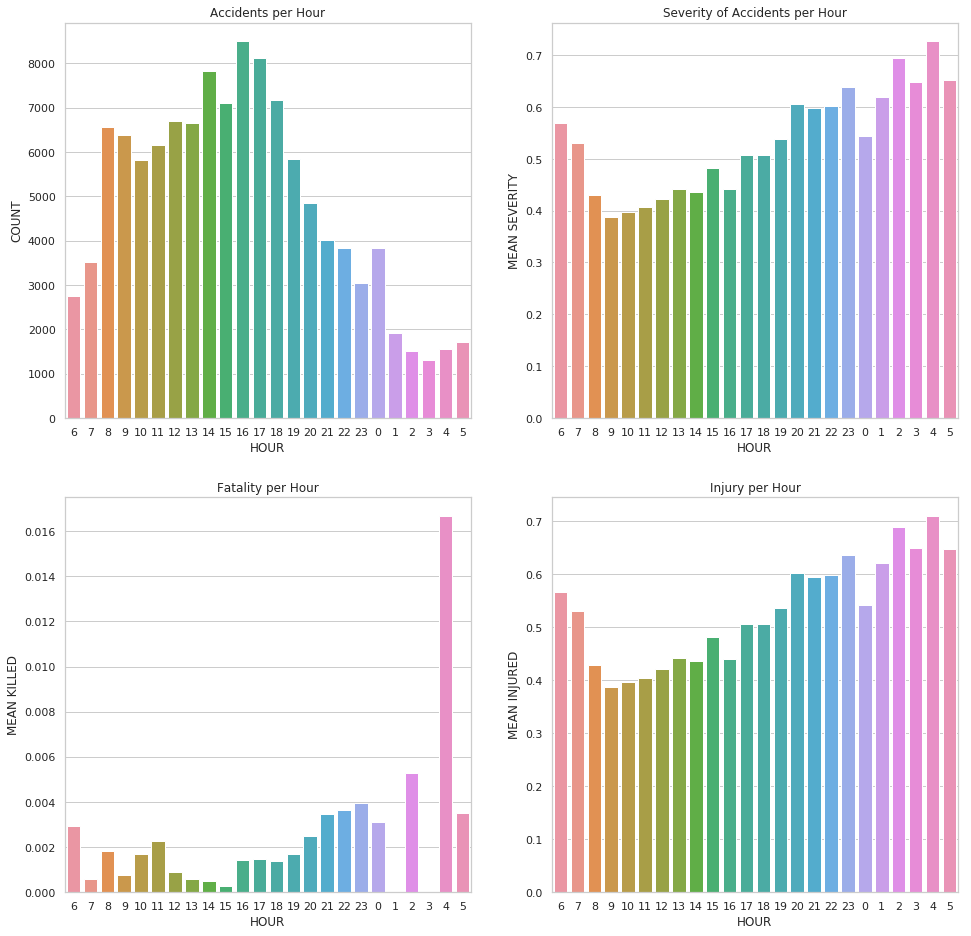

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))
order = np.roll(np.arange(24), -6)
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

collisions_count = collisions.groupby('TIME').count()
collisions_count = collisions_count.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_count, order=order, ax=ax1)
ax1.set_title("Accidents per Hour")
ax1.set_xlabel("HOUR")
ax1.set_ylabel('COUNT')


collisions_mean = collisions.groupby('TIME').mean()
collisions_mean = collisions_mean.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_mean, order=order, ax=ax2)
ax2.set_title("Severity of Accidents per Hour")
ax2.set_xlabel("HOUR")
ax2.set_ylabel('MEAN SEVERITY')

fatality_count = collisions.groupby('TIME').mean()
fatality_count = fatality_count.reset_index()
sns.barplot(x='TIME', y='FATALITY', data=fatality_count, order=order, ax=ax3)
ax3.set_title("Fatality per Hour")
ax3.set_xlabel("HOUR")
ax3.set_ylabel('MEAN KILLED')

injury_count = collisions.groupby('TIME').mean()
injury_count = injury_count.reset_index()
sns.barplot(x='TIME', y='INJURY', data=injury_count, order=order, ax=ax4)
ax4.set_title("Injury per Hour")
ax4.set_xlabel("HOUR")
ax4.set_ylabel('MEAN INJURED')

plt.show();

### Question 1b
Based on the visualizations above, what can you say about each? Make a comparison between the accidents per hour vs the mean severity per hour. What about the number of fatalities per hour vs the number of injuries per hour? Why do we chose to have our hours start at 6 as opposed to 0?

In [10]:
q1b_answer = r"""
For the accidents per hour plot, we see that starting at 6am, there is a consistent upward trend in the number of accidents until 4pm. This is likely due to the volume of traffic increasing on New York roads as people commute to work and people who have to drive around for a living (delivery drivers, cab drivers, truckers, couriers, etc.) getting into action. The peak occurs right as the evening rush hour begins, and accidents per hour decline after that until 3am, when there are likely the least amount of cars on the road. 

For the severity plot, mean severity declines from 6am to 9am during the morning rush hour, likely due to these accidents being less about reckless driving and more due to the volume of cars on New York's roads. From 9am to 3pm, mean severity increases slightly, as there are less cars on the road, but not so little as to say that accidents are due to reckless driving and not due to the volume of cars (you can't drive quickly, but if you make a bad driving action, you will likely hit another car and get into a minor accident). With an exception for the evening rush hour (3pm-6pm) where it is roughly flat, mean severity increases after that until 11pm, as less cars are on the road, allowing for reckless driving by those who are intoxicated, tired, and driving in low visibility conditions. The trend gets particularly acute after midnight, as visibility conditions get worse due to nightfall, and driving patterns get worse due to tiredness (because of the late hour) and increased levels of drunkenness (as people tend to drink at late hours of the night if they are not awake or working), both of which contribute to the high levels of mean severity from midnight to 5am.

For the fatality plot, we see that from 6am to 8pm, mean fatality rates are relatively low, as visibility conditions are good, levels of drunkenness are likely lower, and accidents are due to the volume of cars on the road and cannot occur at high speeds since there is not space to drive quickly. Since there are also large numbers of accidents that occur at this time, combined with the lower mean severity at these times, the mean fatalities per hour stays relatively low. However, at the hours after 8pm, mean fatalities increase until 11pm, as the number of accidents decrease, while mean severity increases, due to reasons listed above. Finally, the rest of the plot after midnight varies. There is no data at 1am and 3am, meaning that in the dataset, nobody was killed in a car crash during the 1am and 3am hours. However, at midnight, 2am, and 4am, there are an increasing number of mean fatalities, as the few accidents that happen at those hours are serious (high mean severity) due to factors listed above, resulting in higher mean fatalities. 

For the injury plot, we see that  from 6am to 9am, there is a decrease in the mean injured, as accidents are more frequent, but less serious (low mean severity). From 9am to 11pm, there is a steady increase in the mean injured, as accidents become more severe (increasing mean severity as seen above) despite the decreasing number of accidents after 4pm. From 8pm onwards, mean injuiries remain steady or increase (with the exception of the midnight hour), a trend that is supported by the increasing mean severity of accidents at these hours. The fewer accidents that occur are more severe and cause more injuries due to the issues of driving at night listed above. 

Accidents per hour and mean severity per hour move in opposite directions from the 6am to 8am hour, as accidents increase and mean severity decreases. From 9am to 4pm, they are less related, as accidents increase more sharply than mean severity does during this time. From 4pm to 4am, the inverse relationship resumes, as the number of accidents per hour declines while mean severity per hour consistently increases. During the 5am hour, the cycle shifts back to the 6am to 8am pattern, as accidents increase while mean severity decreases. 

The number of fatalities per hour and the number of injuries per hour have a less clear relationship. From 6am to 9am, they both decrease, while from 9am to 11am, they both increase. From noon until 3pm, mean fatalities decreases while mean injuries increases. From 4pm to 11pm, mean fatalities increases as does mean injuries. After 11pm the pattern becomes hamstrung by the lack of fatalities in the dataset. Excluding the 1am and 3am hours, mean fatalities and mean injuries move together, as they slightly decrease from 11pm to midnight, and then increase from mindight to 4am, and finally decreasing from 4am to 5am. 

We chose to have our hours start at 6 instead of 0 because 6am is generally regarded as the actual start of people's days. This is the time when people begin to wake up and start commuting to work. It makes sense for this visualization to start at 6am instead of midnight to help us notice the clear patterns of accidents, severity, fatalities, and injuries with regards to the start and end of the workday and morning and evening rush hours. By contrast, if we chose to start at 0 or midnight, these patterns may not be as easily observed or may be missed altogether due to bad trend analysis aided by misleading visualizations. 

"""


print(q1b_answer)


For the accidents per hour plot, we see that starting at 6am, there is a consistent upward trend in the number of accidents until 4pm. This is likely due to the volume of traffic increasing on New York roads as people commute to work and people who have to drive around for a living (delivery drivers, cab drivers, truckers, couriers, etc.) getting into action. The peak occurs right as the evening rush hour begins, and accidents per hour decline after that until 3am, when there are likely the least amount of cars on the road. 

For the severity plot, mean severity declines from 6am to 9am during the morning rush hour, likely due to these accidents being less about reckless driving and more due to the volume of cars on New York's roads. From 9am to 3pm, mean severity increases slightly, as there are less cars on the road, but not so little as to say that accidents are due to reckless driving and not due to the volume of cars (you can't drive quickly, but if you make a bad driving action,

Let's also check the relationship between location and severity. We provide code to visualize a heat map of collisions, where the x and y coordinate are the location of the collision and the heat color is the severity of the collision. Again, we sample N points to speed up visualization. 

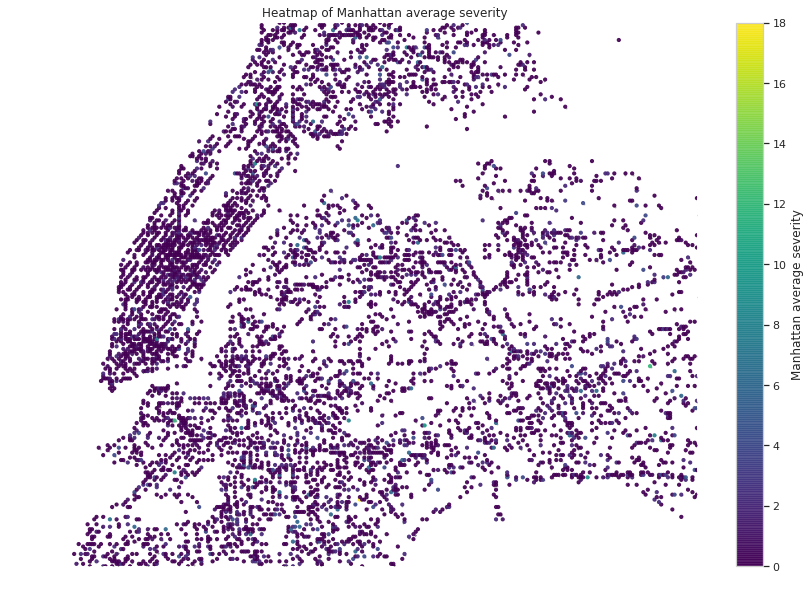

In [11]:
N = 10000
sample = collisions.sample(N)

# Round / bin the latitude and longitudes
sample['lat_bin'] = np.round(sample['LATITUDE'], 3)
sample['lng_bin'] = np.round(sample['LONGITUDE'], 3)

# Average severity for regions
gby_cols = ['lat_bin', 'lng_bin']

coord_stats = (sample.groupby(gby_cols)
               .agg({'SEVERITY': 'mean'})
               .reset_index())

# Visualize the average severity per region
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

scatter_trips = ax.scatter(sample['LONGITUDE'].values,
                           sample['LATITUDE'].values,
                           color='grey', s=1, alpha=0.5)

scatter_cmap = ax.scatter(coord_stats['lng_bin'].values,
                          coord_stats['lat_bin'].values,
                          c=coord_stats['SEVERITY'].values,
                          cmap='viridis', s=10, alpha=0.9)

cbar = fig.colorbar(scatter_cmap)
cbar.set_label("Manhattan average severity")
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Heatmap of Manhattan average severity')
plt.axis('off');

### Question 1c
Do you think the location of the accident has a significant impact on the severity based on the visualization above? Additionally, identify something that could be improved in the plot above and describe how we could improve it.

In [12]:
q1c_answer = r"""

Location of the accident appears to have no significant impact on the mean severity of accidents based on the visualization above. All areas of the heatmap above that are colored appear to be the same shade of purple, indicating that the heatmap displayed says that mean accident severity is roughly the same throughout all parts of New York City displayed on the map. Thus, location of an accident has no impact on the severity according to the visualization above. 

One issue that exists in the plot above is overplotting in midtown and lower Manhattan, as well as some other areas on the map. This could be improved by using spatial clustering to separate datapoints into common locations/areas, and then creating separate heatmaps of mean accident severity on a finer geographic scale. For example, instead of plotting a heatmap of Manhattan, Brooklyn, and Queens, we could create separate plots for each of those boroughs, or go even finer and create plots neighborhood by neighborhood (for example, one plot could contain a heatmap of mean accident severity for Chelsea, another plot could contain a heatmap for Soho, and so on). This would solve the overplotting issue by allowing us to transform the data into smaller, more usable chunks that help us visualize the data better, as well as observe spatial patterns of accident severity more easily, as we could pinpoint high severity areas more easily compared with the heatmap above.  

"""



print(q1c_answer)



Location of the accident appears to have no significant impact on the mean severity of accidents based on the visualization above. All areas of the heatmap above that are colored appear to be the same shade of purple, indicating that the heatmap displayed says that mean accident severity is roughly the same throughout all parts of New York City displayed on the map. Thus, location of an accident has no impact on the severity according to the visualization above. 

One issue that exists in the plot above is overplotting in midtown and lower Manhattan, as well as some other areas on the map. This could be improved by using spatial clustering to separate datapoints into common locations/areas, and then creating separate heatmaps of mean accident severity on a finer geographic scale. For example, instead of plotting a heatmap of Manhattan, Brooklyn, and Queens, we could create separate plots for each of those boroughs, or go even finer and create plots neighborhood by neighborhood (for e

In [13]:
collisions.head()

,DATETIME,Unnamed: 0,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME,DATE,SEVERITY,FATALITY,INJURY
UNIQUE KEY,,,,,,,,,,,,,,,,,,,,,
3589202,2016-12-29 00:00:00,207836,NaN,NaN,40.844107,-73.897997,"(40.8441075, -73.8979971)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,0,2016-12-29,0,0,0
3587413,2016-12-26 14:30:00,208475,NaN,NaN,40.692347,-73.881778,"(40.6923473, -73.8817778)",NaN,NaN,NaN,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,14,2016-12-26,0,0,0
3578151,2016-11-30 22:50:00,214339,NaN,NaN,40.755480,-73.741730,"(40.75548, -73.74173)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,22,2016-11-30,2,0,2
3567096,2016-11-23 20:11:00,218291,NaN,NaN,40.771122,-73.869635,"(40.7711224, -73.8696353)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,20,2016-11-23,0,0,0
3565211,2016-11-21 14:11:00,219698,NaN,NaN,40.828918,-73.838403,"(40.8289179, -73.8384031)",NaN,NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,14,2016-11-21,0,0,0


### Question 1d
Create a plot to visualize one or more features of the `collisions` table. 

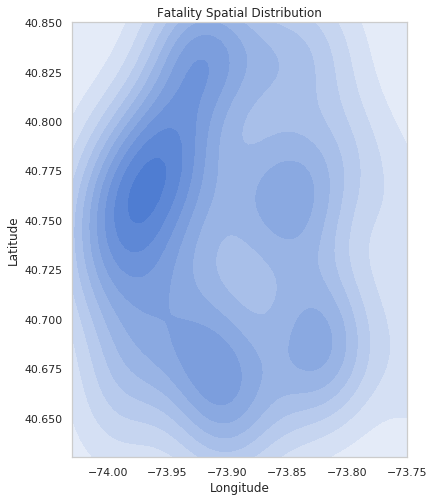

In [14]:
all_fatalities = collisions.loc[collisions['FATALITY'] > 0, :]
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(6,8))
sns.kdeplot(all_fatalities["LONGITUDE"], all_fatalities["LATITUDE"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fatality Spatial Distribution")
plt.show();

### Question 1e
Answer the following questions regarding your plot in 1d.
1. What feature you're visualization
2. Why you chose this feature
3. Why you chose this visualization method

In [15]:
q1e_answer = r"""

I am visualizing the fatality feature of the collisions table. Specifically, I created a 2D KDE plot of the latitude and longitude of all accidents in the collisions table that involved fatalities. I chose this feature because I believe that it could have a significant impact on explaining NYC taxi ridership behavior, as people who live in high fatality areas intuitively should be less likely to drive and more likely to take a taxi than people who live in low fatality areas. I chose this visualization method because it best displays the spatial pattern of accident fatalities compared to the heatmap used in 1c, as it clearly shows density differences in fatalities by area of New York City. There is no overplotting issue (since we are plotting a density distribution and not individual datapoints), meaning that we can clearly observe geographic fatality patterns.  

"""

print(q1e_answer)



I am visualizing the fatality feature of the collisions table. Specifically, I created a 2D KDE plot of the latitude and longitude of all accidents in the collisions table that involved fatalities. I chose this feature because I believe that it could have a significant impact on explaining NYC taxi ridership behavior, as people who live in high fatality areas intuitively should be less likely to drive and more likely to take a taxi than people who live in low fatality areas. I chose this visualization method because it best displays the spatial pattern of accident fatalities compared to the heatmap used in 1c, as it clearly shows density differences in fatalities by area of New York City. There is no overplotting issue (since we are plotting a density distribution and not individual datapoints), meaning that we can clearly observe geographic fatality patterns.  




## 2: Combining External Datasets
It seems like accident timing and location may influence the duration of a taxi ride. Let's start to join our NYC Taxi data with our collisions data. 

Let's assume that an accident will influence traffic in the surrounding area for around 1 hour. Below, we create two columns, `START` and `END`:
- `START`: contains the recorded time of the accident
- `END`: 1 hours after `START`

**Note:** We chose 1 hour somewhat arbitrarily, feel free to experiment with other time intervals outside this notebook.

In [16]:
collisions['START'] = collisions['DATETIME']
collisions['END'] = collisions['START'] + pd.Timedelta(hours=1)

### Question 2a
Drop all of the columns besides the following: `DATETIME`, `TIME`, `START`, `END`, `DATE`, `LATITUDE`, `LONGITUDE`, `SEVERITY`. Feel free to experiment with other subsets outside of this notebook.

In [17]:
collisions_subset = collisions.loc[:, ['DATETIME', 'START', 'TIME', 'END', 'DATE', 'LATITUDE', 'LONGITUDE', 'SEVERITY']]
collisions_subset.head(5)

,DATETIME,START,TIME,END,DATE,LATITUDE,LONGITUDE,SEVERITY
UNIQUE KEY,,,,,,,,
3589202,2016-12-29 00:00:00,2016-12-29 00:00:00,0,2016-12-29 01:00:00,2016-12-29,40.844107,-73.897997,0
3587413,2016-12-26 14:30:00,2016-12-26 14:30:00,14,2016-12-26 15:30:00,2016-12-26,40.692347,-73.881778,0
3578151,2016-11-30 22:50:00,2016-11-30 22:50:00,22,2016-11-30 23:50:00,2016-11-30,40.755480,-73.741730,2
3567096,2016-11-23 20:11:00,2016-11-23 20:11:00,20,2016-11-23 21:11:00,2016-11-23,40.771122,-73.869635,0
3565211,2016-11-21 14:11:00,2016-11-21 14:11:00,14,2016-11-21 15:11:00,2016-11-21,40.828918,-73.838403,0


In [18]:
assert collisions_subset.shape == (116691, 8)

### Question 2b
Now, let's merge our `collisions_subset` table with `train_df`. Start by merging with only the date. We will filter by a time window in a later question.

We should be performing a left join, where our `train_df` is the left table. This is because we want to preserve all of the taxi rides in our end result. It happens that an inner join will also work, since both tables contain data on each date.

Note that the resulting `merged` table will have multiple rows for every taxi ride row in the original `train_df` table. For example, `merged` will have 483 rows with `index` equal to 16709, because there were 483 accidents that occurred on the same date as ride #16709.

Because of memory limitation, we will select the third week of 2016 to analyze. Feel free to change to it week 1 or 2 to see if the observation is general. 

In [19]:
data_file = Path("./", "cleaned_data.hdf")
train_df = pd.read_hdf(data_file, "train")
train_df = train_df.reset_index() 
train_df = train_df[['index', 'tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'duration']]
train_df['date'] = train_df['tpep_pickup_datetime'].dt.date

In [20]:
collisions_subset = collisions_subset[collisions_subset['DATETIME'].dt.weekofyear == 3]
train_df = train_df[train_df['tpep_pickup_datetime'].dt.weekofyear == 3]

In [21]:
train_df.head()

,index,tpep_pickup_datetime,pickup_longitude,pickup_latitude,duration,date
8,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21
10,16244,2016-01-21 13:23:14,-73.970497,40.764194,575.0,2016-01-21
11,16188,2016-01-21 12:08:56,-73.968475,40.764996,1470.0,2016-01-21
15,16753,2016-01-21 23:35:12,-73.988518,40.745411,675.0,2016-01-21
16,16482,2016-01-21 18:33:06,-74.014458,40.709648,1927.0,2016-01-21


In [22]:
# merge the dataframe here
merged = train_df.merge(right = collisions_subset, how = 'left', left_on = 'date', right_on = 'DATE')

merged.head()

,index,tpep_pickup_datetime,pickup_longitude,pickup_latitude,duration,date,DATETIME,START,TIME,END,DATE,LATITUDE,LONGITUDE,SEVERITY
0,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 10:35:00,2016-01-21 10:35:00,10,2016-01-21 11:35:00,2016-01-21,40.701651,-73.991484,0
1,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 13:20:00,2016-01-21 13:20:00,13,2016-01-21 14:20:00,2016-01-21,40.704760,-74.014961,0
2,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 16:00:00,2016-01-21 16:00:00,16,2016-01-21 17:00:00,2016-01-21,40.732891,-73.920574,4
3,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 18:30:00,2016-01-21 18:30:00,18,2016-01-21 19:30:00,2016-01-21,40.714122,-73.831508,0
4,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 00:05:00,2016-01-21 00:05:00,0,2016-01-21 01:05:00,2016-01-21,40.700108,-73.953819,0


In [23]:
assert merged.shape == (1528162, 14)

### Question 2c
Now that our tables are merged, let's use temporal and spatial proximity to condition on the duration of the average length of a taxi ride. Let's operate under the following assumptions.

Accidents only influence the duration of a taxi ride if the following are satisfied:

1) The haversine distance between the the pickup location of the taxi ride and location of the recorded accident is within 5 (km). This is roughly 3.1 miles.

2) The start time of a taxi ride is within a 1 hour interval between the start and end of an accident.

Complete the code below to create an `'accident_close'` column in the `merged` table that indicates if an accident was close or not according to the assumptions above.

In [24]:
def haversine(lat1, lng1, lat2, lng2):
    """
    Compute haversine distance
    """
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    average_earth_radius = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    """
    Compute Manhattan distance
    """
    a = haversine(lat1, lng1, lat1, lng2)
    b = haversine(lat1, lng1, lat2, lng1)
    return a + b

In [25]:
start_to_accident = haversine(merged['pickup_latitude'].values,
                              merged['pickup_longitude'].values,
                              merged['LATITUDE'].values,
                              merged['LONGITUDE'].values)
merged['start_to_accident'] = start_to_accident

# initialze accident_close column to all 0 first
merged['accident_close'] = 0

In [26]:
merged.head()

,index,tpep_pickup_datetime,pickup_longitude,pickup_latitude,duration,date,DATETIME,START,TIME,END,DATE,LATITUDE,LONGITUDE,SEVERITY,start_to_accident,accident_close
0,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 10:35:00,2016-01-21 10:35:00,10,2016-01-21 11:35:00,2016-01-21,40.701651,-73.991484,0,4.433256,0
1,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 13:20:00,2016-01-21 13:20:00,13,2016-01-21 14:20:00,2016-01-21,40.704760,-74.014961,0,4.298554,0
2,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 16:00:00,2016-01-21 16:00:00,16,2016-01-21 17:00:00,2016-01-21,40.732891,-73.920574,4,6.587580,0
3,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 18:30:00,2016-01-21 18:30:00,18,2016-01-21 19:30:00,2016-01-21,40.714122,-73.831508,0,14.348166,0
4,16709,2016-01-21 22:28:17,-73.997986,40.741215,736.0,2016-01-21,2016-01-21 00:05:00,2016-01-21 00:05:00,0,2016-01-21 01:05:00,2016-01-21,40.700108,-73.953819,0,5.894669,0


In [27]:
start_to_accident = haversine(merged['pickup_latitude'].values,
                              merged['pickup_longitude'].values,
                              merged['LATITUDE'].values,
                              merged['LONGITUDE'].values)
merged['start_to_accident'] = start_to_accident

# initialze accident_close column to all 0 first
merged['accident_close'] = 0

# Boolean pd.Series to select the indices for which accident_close should equal 1:
# (1) record's start_to_accident <= 5 
# (2) pick up time is between start and end
is_accident_close = merged.loc[(merged['START'] <= merged['tpep_pickup_datetime']) &  (merged['tpep_pickup_datetime'] <= merged['END']) & (merged['start_to_accident'] <= 5), :].index
merged.loc[is_accident_close, 'accident_close'] = 1


In [28]:
merged['accident_close'].sum()

17743

In [29]:
assert merged['accident_close'].sum() > 16000

The last step is to aggregate the total number of proximal accidents. We want to count the total number of accidents that were close spatially and temporally and condition on that data. 

The code below create a new data frame called `train_accidents`, which is a copy of `train_df`, but with a new column that counts the number of accidents that were close (spatially and temporally) to the pickup location/time. 

In [30]:
train_df = train_df.set_index('index')
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents = train_df.copy()
train_accidents['num_accidents'] = num_accidents

Next, for each value of `num_accidents`, we plot the average `duration` of rides with that number of accidents.

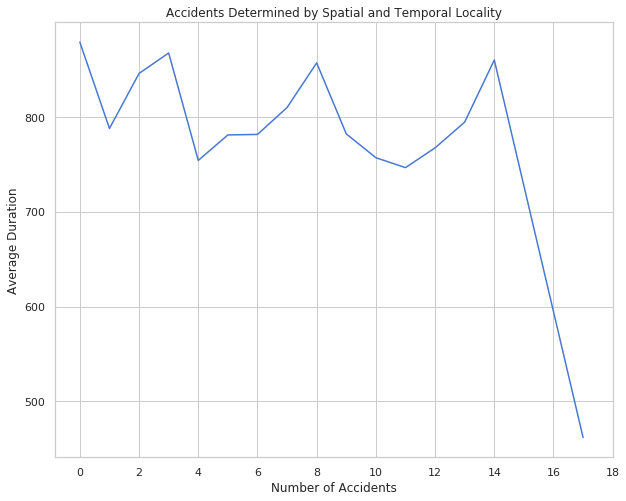

In [31]:
plt.figure(figsize=(10,8))
train_accidents.groupby('num_accidents')['duration'].mean().plot(xticks=np.arange(0, 20, 2))
plt.title("Accidents Determined by Spatial and Temporal Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

It seems that using both spatial and temporal proximity doesn't give us much insight on if collisions increase taxi ride durations. Let's try conditioning on spatial proximity and temporal proximity separately and see if there are more interesting results there.

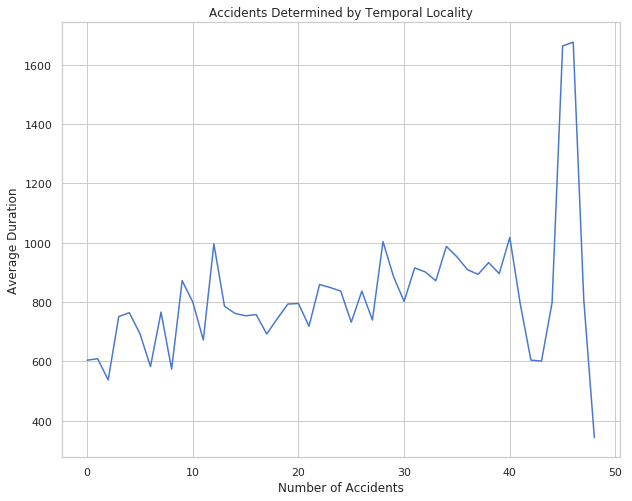

In [32]:
# Temporal locality

# Condition on time
index = (((merged['tpep_pickup_datetime'] >= merged['START']) & \
         (merged['tpep_pickup_datetime'] <= merged['END'])))

# Count accidents
merged['accident_close'] = 0
merged.loc[index, 'accident_close'] = 1
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents_temporal = train_df.copy()
train_accidents_temporal['num_accidents'] = num_accidents

# Plot
plt.figure(figsize=(10,8))
train_accidents_temporal.groupby('num_accidents')['duration'].mean().plot()
plt.title("Accidents Determined by Temporal Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

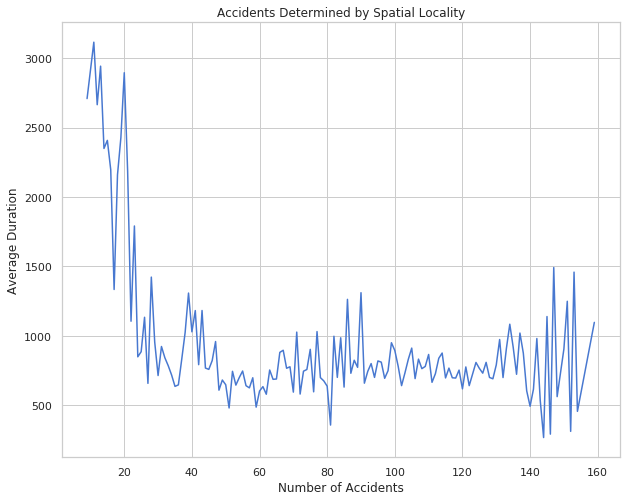

In [33]:
# Spatial locality

# Condition on space
index = (merged['start_to_accident'] <= 5)

# Count accidents
merged['accident_close'] = 0
merged.loc[index, 'accident_close'] = 1
num_accidents = merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents_spatial = train_df.copy()
train_accidents_spatial['num_accidents'] = num_accidents

# Plot
plt.figure(figsize=(10,8))
train_accidents_spatial.groupby('num_accidents')['duration'].mean().plot()
plt.title("Accidents Determined by Spatial Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

### Question 2d
By conditioning on temporal and spatial proximity separately, we reveal different trends in average ride duration as a function of number of accidents nearby.

What can you say about the temporal and spatial proximity of accidents to taxi rides and the effect on ride duration? Think of a new hypothesis regarding accidents and taxi ride durations and explain how you would test it.

Additionally, comment on some of the assumptions being made when we condition on temporal and spatial proximity separately. What are the implications of only considering one and not the other? 

In [34]:
q2d_answer = r"""

With respect to spatial proximity, we see that the higher the number of accidents is, the shorter average duration is. This means the higher number of accidents in the locality (spatially), the shorter trip duration is, the opposite of our initial intuition which said that the higher number of accidents in the locality (spatially), the longer trip duration would be. 
With respect to temporal proximity, we see that from 0-40, the higher the number of accidents is, the longer average duration is, which is in line with our original intuition (more accidents in the locality (temporally), longer the trip duration would be). From 40-50 however, the trend becomes muddled, as there are sharp increases and decreases that conflict with each other, creating an unclear trend for this subsection of data. 
A new hypothesis would be that the higher number of accidents (spatially), the shorter average trip duration would be. I could test this by using a linear regression using this spatial proximity feature to predict the average trip duration. Depending on the value of the coefficient of the feature and its associated p-value, then we can reject or fail to reject this hypothesis. 
When we condition on temporal and spatial proximity separately, we are saying that there is no relationship between the 2 variables (there is no multicollinearity issue). This is a suspect assumption, as my intuition strongly tells me that the two are related. This could be confirmed by running an F test. Furthermore, by only considering one and not the other, we are implicitly saying that if one feature is statistically significant, then the other will not be signficant at the same time. In other words, only one or the other will be statistically significant. This ignores the real possibility that both features could be significant in predicting trip duration, which could be tested by running a linear regression with both features to predict average trip duration. 

"""


print(q2d_answer)



With respect to spatial proximity, we see that the higher the number of accidents is, the shorter average duration is. This means the higher number of accidents in the locality (spatially), the shorter trip duration is, the opposite of our initial intuition which said that the higher number of accidents in the locality (spatially), the longer trip duration would be. 
With respect to temporal proximity, we see that from 0-40, the higher the number of accidents is, the longer average duration is, which is in line with our original intuition (more accidents in the locality (temporally), longer the trip duration would be). From 40-50 however, the trend becomes muddled, as there are sharp increases and decreases that conflict with each other, creating an unclear trend for this subsection of data. 
A new hypothesis would be that the higher number of accidents (spatially), the shorter average trip duration would be. I could test this by using a linear regression using this spatial proximity

## Part 3 Exports
We are not requiring you to export anything from this notebook, but you may find it useful to do so. There is a space below for you to export anything you wish.

In [35]:
Path("data/part3").mkdir(parents=True, exist_ok=True)
data_file = Path("data/part3", "data_part3.hdf") # Path of hdf file
...

Ellipsis

## Part 3 Conclusions

We merged the NYC Accidents dataset with our NYC Taxi dataset, conditioning on temporal and spatial locality. We explored potential features by visualizing the relationship between number of accidents and the average duration of a ride. 

**Please proceed to part 4 where we will be engineering more features and building our models using a processing pipeline.**

## Submission

You're almost done!

Before submitting this assignment, ensure that you have:

1. Restarted the Kernel (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Validated the notebook by clicking the "Validate" button.

Then,

1. **Submit** the assignment via the Assignments tab in **Datahub** 
1. **Upload and tag** the manually reviewed portions of the assignment on **Gradescope**